In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
!pip install nltk



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import nltk as nltk

nltk.download('punkt_tab')
nltk.download('stopwords', quiet=True)

[nltk_data] Downloading package punkt_tab to C:\Users\FINE
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df=pd.read_csv('spam (2).csv')

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.sample(5)


,Category,Message
1003,ham,Yes..he is really great..bhaji told kallis bes...
370,ham,"Cool, text me when you're ready"
4765,ham,Hi.:)technical support.providing assistance to...
575,ham,Nope i waiting in sch 4 daddy...
3281,ham,Badrith is only for chennai:)i will surely pic...


In [7]:
df.shape

(5572, 2)

In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(415)

In [10]:
df.drop_duplicates(inplace=True, keep= 'first')

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
from sklearn.preprocessing import LabelEncoder
df['Category']=LabelEncoder().fit_transform(df['Category'])

In [13]:
df.shape

(5157, 2)

In [14]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

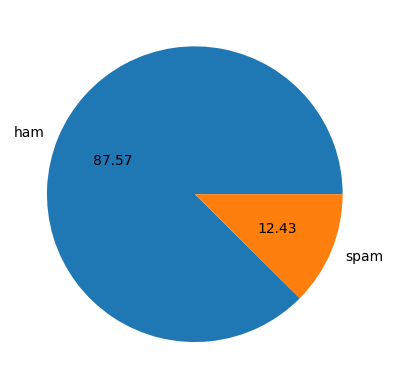

In [15]:
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [16]:
df['num_char']=df['Message'].apply(len)

In [17]:
df

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
df['num_words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df['num_sent']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df[df['Category']==0][['num_char','num_words','num_sent']]

,num_char,num_words,num_sent
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,36,9,1
5569,57,15,2
5570,125,27,1


In [21]:
df[df['Category']==1][['num_char','num_words','num_sent']]

,num_char,num_words,num_sent
2,155,37,2
5,147,39,4
8,157,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,158,38,6
5547,160,35,5
5566,147,30,1


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\1316912494.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==0]['num_char'])
C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\1316912494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==1]['nu

<Axes: xlabel='num_char', ylabel='Density'>

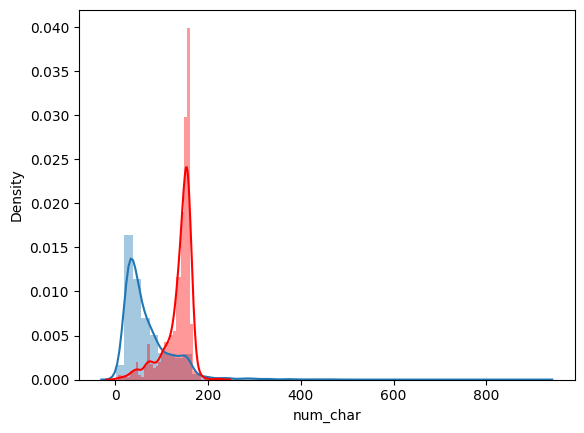

In [22]:
sns.distplot(df[df['Category']==0]['num_char'])
sns.distplot(df[df['Category']==1]['num_char'],color='red')

C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\3652905167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==0]['num_words'])
C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\3652905167.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==1]['n

<Axes: xlabel='num_words', ylabel='Density'>

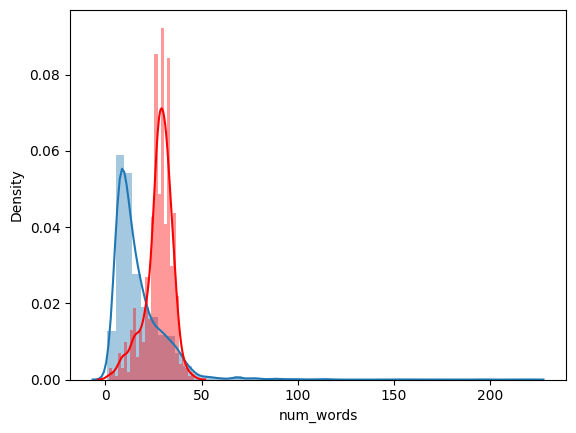

In [23]:
sns.distplot(df[df['Category']==0]['num_words'])
sns.distplot(df[df['Category']==1]['num_words'],color='red')

C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\2248985779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==0]['num_sent'])
C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_9156\2248985779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']==1]['nu

<Axes: xlabel='num_sent', ylabel='Density'>

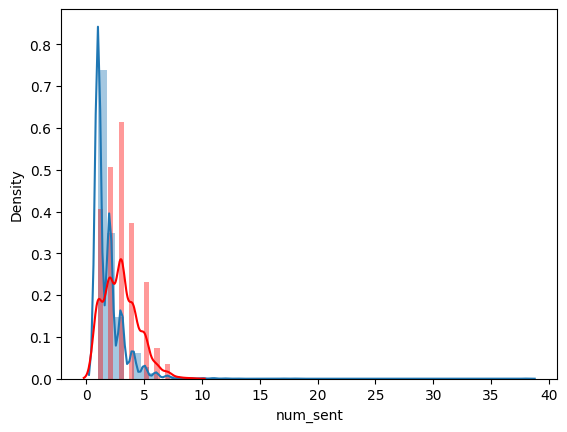

In [24]:
sns.distplot(df[df['Category']==0]['num_sent'])
sns.distplot(df[df['Category']==1]['num_sent'],color='red')

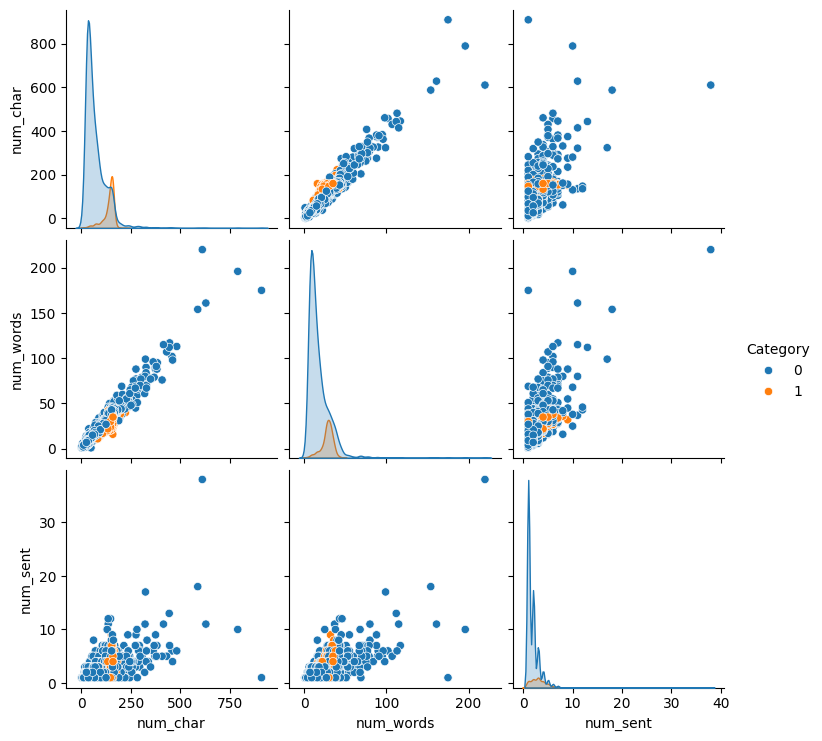

In [25]:
sns.pairplot(df,hue='Category')

<Axes: >

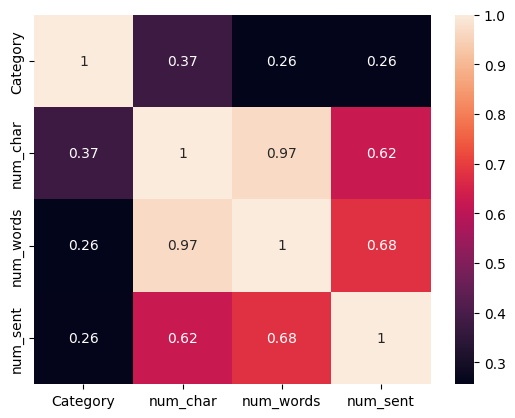

In [26]:
sns.heatmap(df[['Category', 'num_char', 'num_words', 'num_sent']].corr(), annot=True)

In [27]:
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import string

ps = PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  Y= []
  for i in text:
    if i.isalnum():
      Y.append(i)
  text=Y[:]
  Y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      Y.append(i)
  text=Y[:]
  Y.clear()
  for i in text:
    Y.append(ps.stem(i))
  return " ".join(Y)

In [28]:
df['transformed_message']=df['Message'].apply(transform_text)

In [29]:
df

,Category,Message,num_char,num_words,num_sent,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [30]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_message'].str.cat(sep=" "))

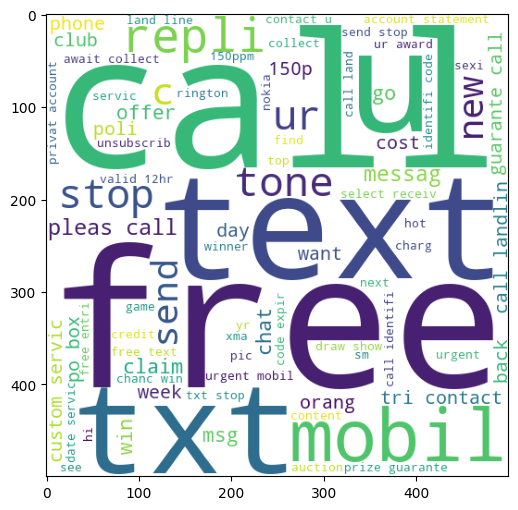

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

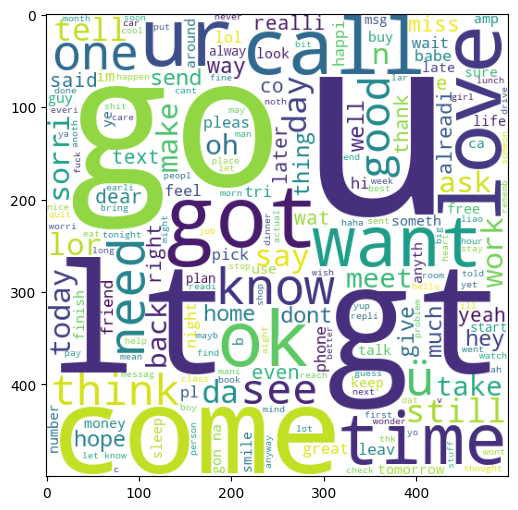

In [33]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [34]:
spam_corpus=[]
for mail in df[df['Category']==1]['transformed_message'].tolist():
  for word in mail.split():
    spam_corpus.append(word)

In [35]:
len(spam_corpus)

9781

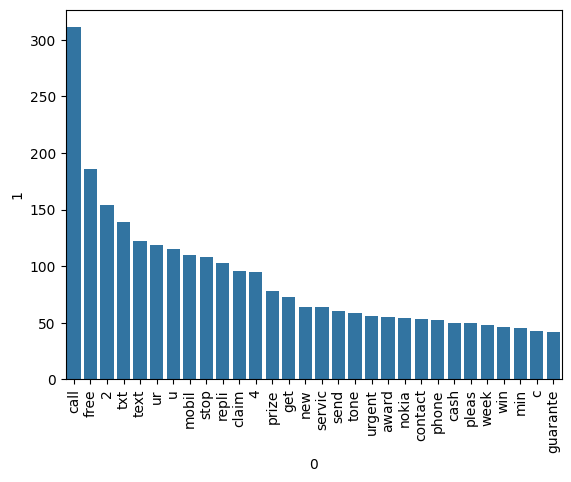

In [36]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
ham_corpus=[]
for mail in df[df['Category']==0]['transformed_message'].tolist():
  for word in mail.split():
    ham_corpus.append(word)

In [38]:
len(ham_corpus)

35940

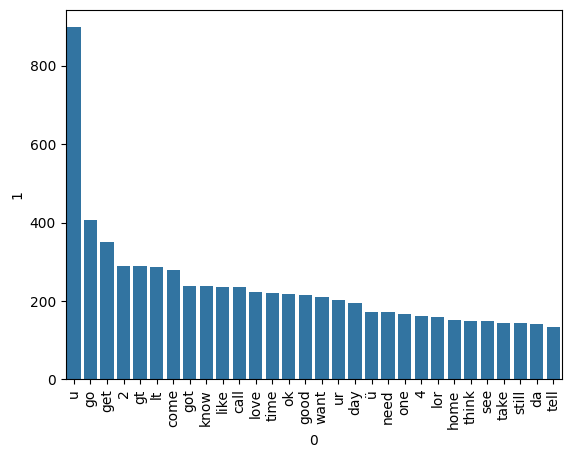

In [39]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [41]:
##X = cv.fit_transform(df['transformed_message']).toarray()
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [42]:
X.shape

(5157, 3000)

In [43]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [44]:
Y= df['Category'].values

In [45]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [49]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [50]:
gnb.fit(X_train,Y_train)
Y_pred1= gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.8672480620155039
[[786 119]
 [ 18 109]]
0.4780701754385965


In [51]:
mnb.fit(X_train,Y_train)
Y_pred2= mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [52]:
bnb.fit(X_train,Y_train)
Y_pred3= bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [53]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:

#clfs = {
 #   'SVC' : svc,
  #  'KN' : knc,
   # 'NB': mnb,
    #'DT': dtc,
    #'LR': lrc,
    #'RF': rfc,
    #'AdaBoost': abc,
    #'BgC': bc,
    #'ETC': etc,
    #'GBDT':gbdt,
    #'xgb':xgb}


In [57]:
#def train_classifier(clf, X_train, Y_train, X_test, Y_test):
#  clf.fit(X_train, Y_train)
#  Y_pred= clf.predict(X_test)
#  accuracy= accuracy_score(Y_test, Y_pred)
 # precision= precision_score(Y_test, Y_pred)
 # return accuracy, precision

In [58]:
#model_acc_results=[]
#model_prec_results=[]
#for name, models in clfs.items():
 # current_accuracy,current_precision= train_classifier(models, X_train,Y_train,X_test,Y_test)
  #print('Model', name)
  #print('Accuracy', current_accuracy)
  #print('Precision', current_precision)
  #model_acc_results.append(current_accuracy)
  #model_prec_results.append(current_precision)

In [59]:
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':model_acc_results,'Precision':model_prec_results}).sort_values('Precision',ascending=False)

NameError: name 'clfs' is not defined

In [60]:
#performance_df

In [61]:
# Voting Classifier
#rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

#from sklearn.ensemble import VotingClassifier

In [62]:
#voting = VotingClassifier(estimators=[('rfc', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [63]:
#voting.fit(X_train,Y_train)
#y_pred = voting.predict(X_test)
#print("Accuracy",accuracy_score(Y_test,y_pred))
#print("Precision",precision_score(Y_test,y_pred))

In [64]:
etc.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [68]:
y_pred=etc.predict(X_test)

In [69]:
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9806201550387597
Precision 1.0


In [65]:
import  pickle

In [66]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))